# Recommendation Engine

Based on the data collected, I have created a predictive model which will predict the category of the customer.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
#from xgboost import XGBClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import statsmodels.api as sm

C:\Users\PRATIK\Documents\ANACONDA\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PRATIK\Documents\ANACONDA\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\PRATIK\Documents\ANACONDA\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train=pd.read_csv("train.csv")

In [3]:
test=pd.read_csv("test.csv")

In [4]:
train.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [5]:
train.describe()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
count,10738.000000,10696.000000,10738.000000,10701.000000,10738.000000,10692.000000,10672.000000,10738.000000,10738.000000
mean,19.060941,5.274847,0.175912,0.374230,2.376895,5.788180,3.150071,17.061836,0.120600
std,7.419609,1.882559,0.372829,1.222031,5.601911,2.531309,1.035416,18.762693,0.325677
min,0.568965,-0.161940,-0.547989,-0.462494,0.028575,2.752836,0.363338,-0.486834,0.000000
25%,13.518021,3.971587,0.010840,-0.027666,0.313610,4.193234,2.454017,4.530085,0.000000
50%,18.774109,5.218479,0.074078,0.037201,0.516830,4.842575,3.118394,12.653357,0.000000
75%,24.501719,6.520364,0.159606,0.179029,1.125380,6.286400,3.756566,23.114577,0.000000
max,47.306691,16.638243,2.679474,14.701914,52.395014,18.743836,9.090206,248.552755,1.000000


### Data Cleaning

As we can see there are few NA values in some of the columns of train and test dataset. I chose to replace NA values in numerical columns by their medians and categorical columns by their modes.

In [6]:
train.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [7]:
test.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [8]:
train.dtypes

customer_id                          object
customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object

In [9]:
train['X1'].value_counts()

BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64

In [10]:
train['X1']=train['X1'].fillna("BA")

In [11]:
test['X1']=test['X1'].fillna("BA")

In [12]:
train['customer_active_segment'].value_counts()

C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64

In [13]:
train['customer_active_segment']=train['customer_active_segment'].fillna("C")

In [14]:
train.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment              0
X1                                   0
customer_category                    0
dtype: int64

In [15]:
test['customer_active_segment']=test['customer_active_segment'].fillna("C")

In [16]:
test.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment              0
X1                                   0
dtype: int64

In [17]:
train['customer_product_search_score']=train['customer_product_search_score'].fillna(train['customer_product_search_score'].median())

In [18]:
test['customer_product_search_score']=test['customer_product_search_score'].fillna(test['customer_product_search_score'].median())

In [19]:
train['customer_stay_score']=train['customer_stay_score'].fillna(train['customer_stay_score'].median())

In [20]:
test['customer_stay_score']=test['customer_stay_score'].fillna(test['customer_stay_score'].median())

In [21]:
train['customer_product_variation_score']=train['customer_product_variation_score'].fillna(train['customer_product_variation_score'].median())

In [22]:
test['customer_product_variation_score']=test['customer_product_variation_score'].fillna(test['customer_product_variation_score'].median())

In [23]:
train['customer_order_score']=train['customer_order_score'].fillna(train['customer_order_score'].median())

In [24]:
test['customer_order_score']=test['customer_order_score'].fillna(test['customer_order_score'].median())

In [25]:
train.isna().sum()

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
customer_category                   0
dtype: int64

In [26]:
test.isna().sum()

customer_id                         0
customer_visit_score                0
customer_product_search_score       0
customer_ctr_score                  0
customer_stay_score                 0
customer_frequency_score            0
customer_product_variation_score    0
customer_order_score                0
customer_affinity_score             0
customer_active_segment             0
X1                                  0
dtype: int64

### Eliminating redundant features

I have obtained correlation within the train dataset's numerical features and eliminated numerical features one by one. I retain features having correlation coefficients between -0.5 and 0.5.

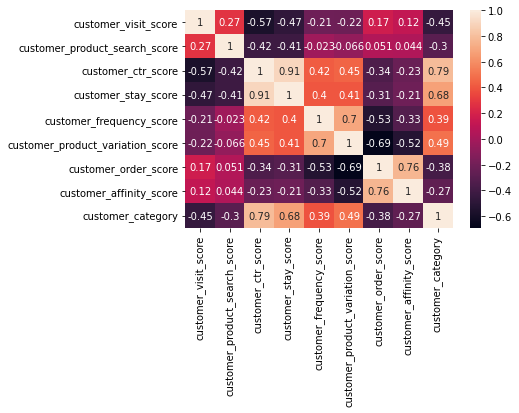

In [27]:
sn.heatmap(train.corr(), annot=True)
plt.show()

In [28]:
train=train.drop(['customer_ctr_score'],axis=1)
test=test.drop(['customer_ctr_score'],axis=1)

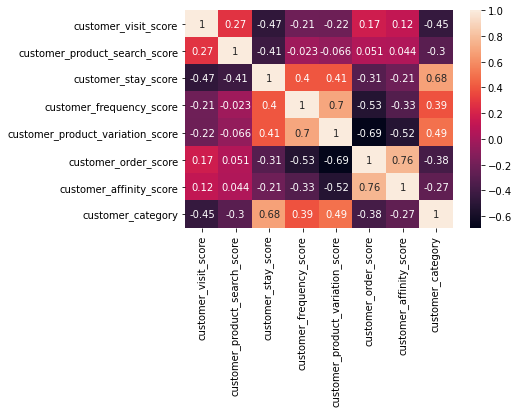

In [29]:
sn.heatmap(train.corr(), annot=True)
plt.show()

In [30]:
train=train.drop(['customer_product_variation_score'],axis=1)
test=test.drop(['customer_product_variation_score'],axis=1)

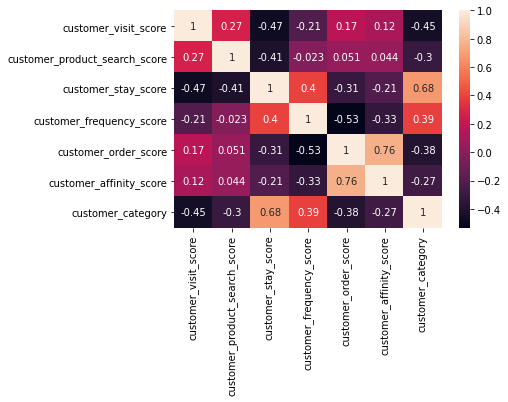

In [31]:
sn.heatmap(train.corr(), annot=True)
plt.show()

In [32]:
train=train.drop(['customer_order_score'],axis=1)
test=test.drop(['customer_order_score'],axis=1)

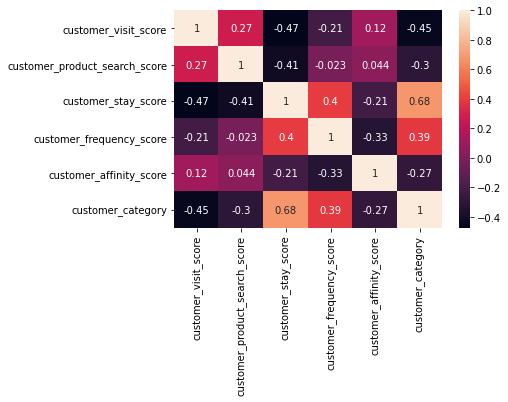

In [33]:
sn.heatmap(train.corr(), annot=True)
plt.show()

In [34]:
train=train.drop(['customer_frequency_score'],axis=1)
test=test.drop(['customer_frequency_score'],axis=1)

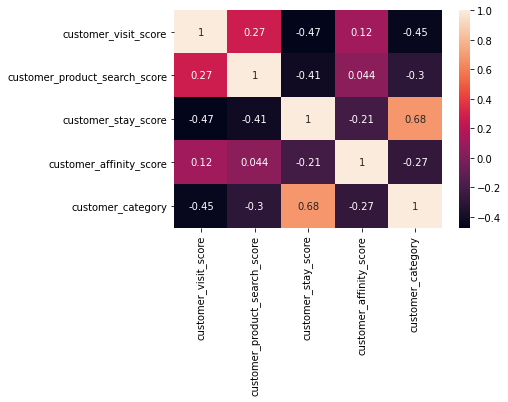

In [35]:
sn.heatmap(train.corr(), annot=True)
plt.show()

In [36]:
train.describe()

,customer_visit_score,customer_product_search_score,customer_stay_score,customer_affinity_score,customer_category
count,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000
mean,19.060941,5.274627,0.373069,17.061836,0.120600
std,7.419609,1.878876,1.220083,18.762693,0.325677
min,0.568965,-0.161940,-0.462494,-0.486834,0.000000
25%,13.518021,3.975558,-0.027413,4.530085,0.000000
50%,18.774109,5.218479,0.037201,12.653357,0.000000
75%,24.501719,6.513742,0.178511,23.114577,0.000000
max,47.306691,16.638243,14.701914,248.552755,1.000000


### Removing Outliers

I found that customer_affinity_score column has outlier which far more than outliers of other columns. Removing outliers by keeping data points between IQR range was resulting in removing some of the unique categorical data points and was giving problems while doing One Hot Encoding. Hence retained datapoints with outliers having customer_affinity_score less than 125.

In [37]:
train=train[train['customer_affinity_score']<=125]

In [38]:
X=train.drop(['customer_category','customer_id'],axis=1)
y=train['customer_category']
X=pd.get_dummies(X)

Created OLS model to find out which categorical columns to remove. Since P value for each column is less than 0.05, retaining all the columns.

In [39]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      customer_category   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     957.3
Date:                Fri, 04 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:36:55   Log-Likelihood:                 712.16
No. Observations:               10707   AIC:                            -1398.
Df Residuals:                   10694   BIC:                            -1304.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
customer_visit

### Creating model

Looping through 0 to 99 to find out random state that will give the best score. I chose SVM Classifier as it was giving me a generalized model compared to RandomForest Classifier and XGBoost Classifier.

In [40]:
list1=[]
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=i)
    sc=StandardScaler() 
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model = SVC()
    model.fit(X_train,y_train)
    a=model.score(X_test,y_test)
    b=model.score(X_train,y_train)
    list1.append((a,b,i))
    #print(a,b,i)

In [41]:
list1.sort(key=lambda x:x[0], reverse=True)

In [42]:
list1[0]

(0.972922502334267, 0.9615878575598366, 67)

Found random state 67 giving best score on test data set. Also the model is generalized model as it is giving more score on validation dataset than the train dataset.

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=67)
sc=StandardScaler() 
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
model = SVC()
model.fit(X_train,y_train)
a=model.score(X_test,y_test)
b=model.score(X_train,y_train)
print(a,b)

0.972922502334267 0.9615878575598366


Since 0.97 is a good precision value I have finalized this model for final submission.

In [44]:
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1905
           1       0.97      0.78      0.86       237

    accuracy                           0.97      2142
   macro avg       0.97      0.89      0.92      2142
weighted avg       0.97      0.97      0.97      2142



### Predicting on Test Data

In [45]:
X_test=test.drop(["customer_id"],axis=1)
X_test=pd.get_dummies(X_test)
X_test=sc.transform(X_test)
y_pred=model.predict(X_test)
test['customer_category']=y_pred

In [46]:
test.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_stay_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_10739,22.500174,3.702145,0.093253,7.661716,B,BA,0
1,csid_10740,13.225950,3.600102,0.053575,33.999679,B,AA,0
2,csid_10741,14.603376,5.084047,-0.036299,33.485630,B,AA,0
3,csid_10742,26.149905,3.025501,0.204591,0.795372,B,BA,0
4,csid_10743,19.810630,5.020400,-0.028780,15.052058,C,BA,0


In [47]:
df=test[['customer_id','customer_category']]

In [48]:
df.head()

,customer_id,customer_category
0,csid_10739,0
1,csid_10740,0
2,csid_10741,0
3,csid_10742,0
4,csid_10743,0


In [49]:
df.describe()

,customer_category
count,7160.000000
mean,0.040084
std,0.196169
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [50]:
df['customer_category'].value_counts()

0    6873
1     287
Name: customer_category, dtype: int64

### Creating final submission file

In [51]:
df.to_csv('final_submission.csv', index=False)